In [46]:
import numpy as np
import pandas as pd 
import seaborn as sb 
import statsmodels 
import statsmodels.api as sm 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
df=pd.read_csv('C:\\Users\\kanaw\\Desktop\\SOCR-HeightWeight.csv') 
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [47]:
df.columns

Index(['Index', 'Height(Inches)', 'Weight(Pounds)'], dtype='object')

In [48]:
df.shape

(25000, 3)

In [49]:
df.info

<bound method DataFrame.info of        Index  Height(Inches)  Weight(Pounds)
0          1        65.78331        112.9925
1          2        71.51521        136.4873
2          3        69.39874        153.0269
3          4        68.21660        142.3354
4          5        67.78781        144.2971
...      ...             ...             ...
24995  24996        69.50215        118.0312
24996  24997        64.54826        120.1932
24997  24998        64.69855        118.2655
24998  24999        67.52918        132.2682
24999  25000        68.87761        124.8742

[25000 rows x 3 columns]>

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Index           25000 non-null  int64  
 1   Height(Inches)  25000 non-null  float64
 2   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 586.1 KB


In [51]:
df.index

RangeIndex(start=0, stop=25000, step=1)

In [52]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


In [53]:
df.drop(['Index'], axis=1)

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971
...,...,...
24995,69.50215,118.0312
24996,64.54826,120.1932
24997,64.69855,118.2655
24998,67.52918,132.2682


<Axes: xlabel='Height(Inches)', ylabel='Weight(Pounds)'>

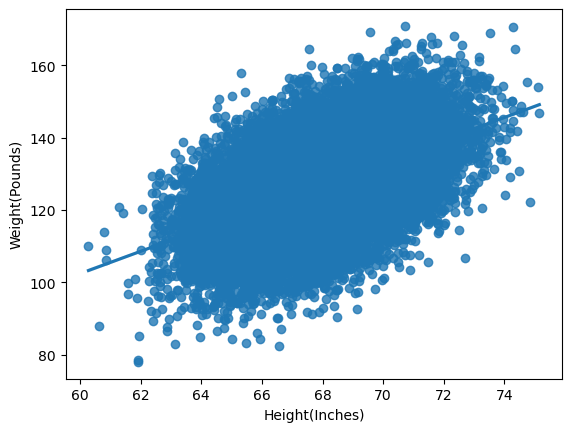

In [9]:
sb.regplot(x='Height(Inches)',y='Weight(Pounds)',data=df)

<Axes: xlabel='Weight(Pounds)', ylabel='Height(Inches)'>

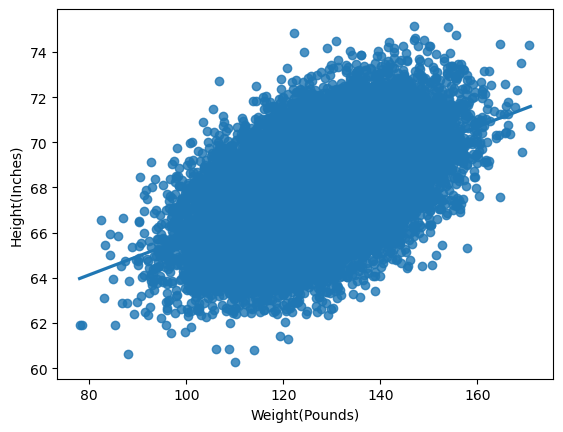

In [11]:
sb.regplot(x='Weight(Pounds)',y='Height(Inches)',data=df)

In [54]:
df.corr()

,Index,Height(Inches),Weight(Pounds)
Index,1.000000,0.009626,-0.007257
Height(Inches),0.009626,1.000000,0.502859
Weight(Pounds),-0.007257,0.502859,1.000000


<Axes: >

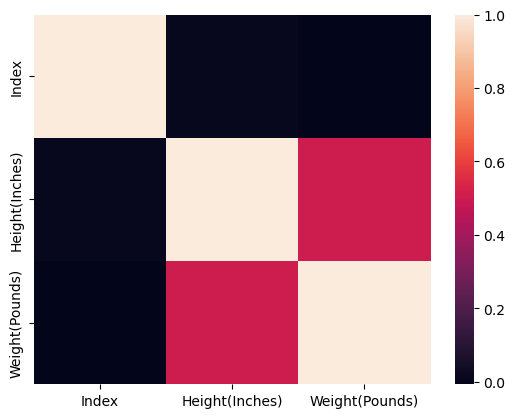

In [55]:
sb.heatmap(df.corr())

<Axes: >

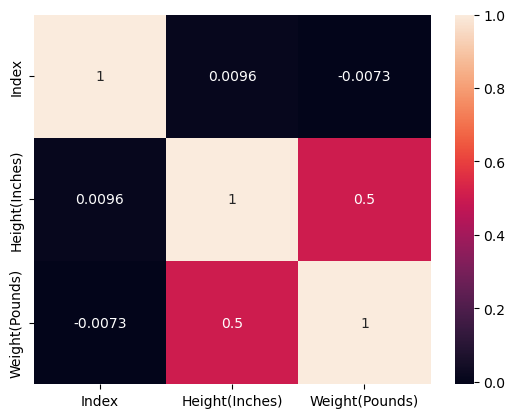

In [56]:
sb.heatmap(df.corr(),annot=True)

In [76]:
x=df[['Weight(Pounds)']]
y=df[['Height(Inches)']]

In [77]:
x

,Weight(Pounds)
0,112.9925
1,136.4873
2,153.0269
3,142.3354
4,144.2971
...,...
24995,118.0312
24996,120.1932
24997,118.2655
24998,132.2682


In [78]:
y

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [80]:
x_train

,Weight(Pounds)
6655,143.2796
6085,106.8729
21848,123.2887
5106,128.3985
21856,116.1444
...,...
10955,144.9647
17289,140.1161
5192,116.3620
12172,127.0436


In [81]:
y_train

,Height(Inches)
6655,69.51352
6085,65.01631
21848,67.06874
5106,69.05674
21856,66.84693
...,...
10955,70.63329
17289,69.23837
5192,66.21022
12172,65.25058


In [82]:
lin_model=LinearRegression()

In [83]:
lin_model.fit(x_train,y_train)

LinearRegression()

In [84]:
m=lin_model.coef_
m

array([[0.08176892]])

In [85]:
c=lin_model.intercept_
c

array([57.60338343])

In [86]:
y_pred=lin_model.predict(x_test)

In [87]:
y_pred

array([[67.95445404],
       [68.9460494 ],
       [67.74358834],
       ...,
       [67.51121742],
       [68.04280536],
       [66.39606921]])

In [88]:
y_test

,Height(Inches)
21492,69.66876
9488,66.53552
16933,67.36390
12604,68.69334
8222,67.43133
...,...
11139,66.69195
19053,68.48377
7037,67.60595
17119,67.03529


In [90]:
test_accuracy=r2_score(y_test,y_pred)
test_accuracy

0.25614331476741403

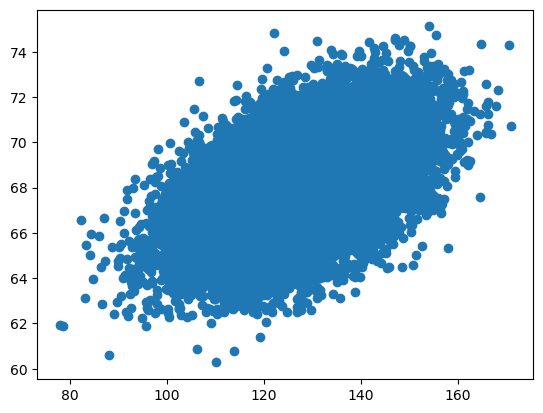

In [91]:
plt.scatter(x_train,y_train)

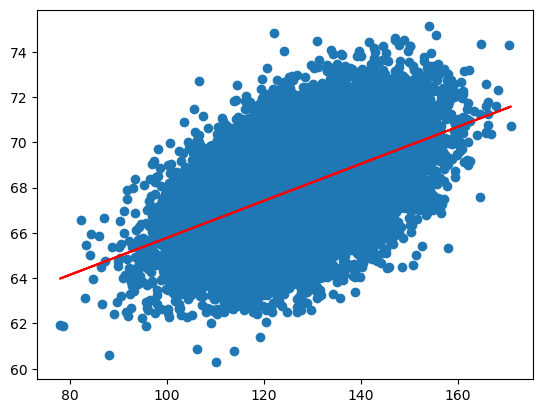

In [92]:
plt.scatter(x_train,y_train)
plt.plot(x_train,m*x_train+c,'r')
plt.show()